<a href="https://colab.research.google.com/github/XingruiWang/Animefy/blob/master/Notebook/Animefy-yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animefy yourself!

Github 项目在[这里](https://github.com/XingruiWang/Animefy/blob/master/README.md)，里边也有详细介绍与代码。


<img src="https://raw.githubusercontent.com/XingruiWang/Animefy/master/example/example.png" alt="example" style="width: 100%;" />


### 一、关于项目

这是一个基于StyleGAN2模型的"selfie2anime"项目。你可以使用现实世界的**自拍照片**得到你具有个性的**二次元头像**。


我们大作业的代码是根据StyleGAN2模型\[[官方代码](https://github.com/NVlabs/stylegan2)\]\[[论文](https://arxiv.org/abs/1912.04958)\]\[[视频介绍](https://youtu.be/c-NJtV9Jvp0)\]以及[Justin Pinkney](https://www.justinpinkney.com/)提出的layer swapping 技术 . 同时也参考了[Tetratrio](https://github.com/Tetratrio/stylegan2_pytorch)完成的Pytorch版本的StyleGAN2代码。

### 二、主要文件介绍

```
Animefy
│  README.md -------------------------------- Description of the projects.
│  latent.sh -------------------------------- The script to find latent feature of a given image.
│  run.sh ----------------------------------- The script to train the model.
│  synthesis.sh ----------------------------- The script to generate animate image without condition.
│  align_images.py -------------------------- Align the face of given images, since the given selfie image might not in the same scale.
│  blend.py --------------------------------- Blend the model after well trained.
│  generate.py ------------------------------ Generate animate image based on the latent code.
│  run_convert_from_tf.py ------------------- Convert pretrained model file in tensorflow to pytorch.
│  run_generator.py ------------------------- Generate animte images without condition (i.e. latent code), called by `synthesis.sh`.
│  run_metrics.py --------------------------- Caculate the metric of trained model.
│  run_projector.py ------------------------- Find latent feature of a given image, called by `latent.sh`.
│  run_training.py -------------------------- Train the model, called by `run.sh`.
│  requirements.txt ------------------------- Environment required, can be set up using `pip install -r requirements.txt`.
│  settings_with_pretrain.yaml -------------- Configuration when training the model.
│
├─environment
│      anime.yaml
│
├─example
│      example.png ------------------------- Example image of the process of finding latent code and generate corresponding anime image by interating.
│
├─Notebook
│      Animefy-yourself.ipynb -------------- Description notebook of the project.
│
├─projects
│  │  resize.py ---------------------------- Might be useless now, resize the selfie image to 512 × 512.
│  │
│  └─latent
│          image0000-target.png
│
└─stylegan2 -------------------------------- Core files.
    │  loss_fns.py ------------------------- Loss function.
    │  models.py --------------------------- StyleGAN2 model file
    │  modules.py -------------------------- Dependence module of StyleGAN2.
    │  project.py -------------------------- Find the latent code.
    │  train.py ---------------------------- Define class `Trainer` to train the model.
    │  utils.py ---------------------------- Utility file of model and training.
    │  __init__.py ------------------------- Using for importing.
    │
    ├─external_models
    │      inception.py -------------------- Inception module.
    │      lpips.py ------------------------ Caculate the similarity between images.
    │      __init__.py
    │
    └─metrics ------------------------------ Metric file.
            fid.py ------------------------- Fréchet Inception Distance。
            ppl.py ------------------------- Perplexity.
            __init__.py -------------------- Using for importing.

```


### 三、复现代码

#### 1. 数据集

我们使用的数据集为[二次元头像数据集](http://www.seeprettyface.com/mydataset_page3.html#anime)，这个数据集摘选并处理自[DANBOORU2018](https://www.gwern.net/Danbooru2020#danbooru2018)，包含140000张动漫人脸（[百度网盘](https://pan.baidu.com/share/init?surl=8pHjzcOWhVF2u6LKOlT3yg)(提取码：JIMD)）

#### 2. 安装项目

1. 复制github项目：

In [1]:
!git clone https://github.com/XingruiWang/Animefy.git
%cd Animefy

Cloning into 'Animefy'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 443 (delta 54), reused 0 (delta 0), pack-reused 305
Receiving objects: 100% (443/443), 33.43 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (169/169), done.
/content/Animefy


2. 配置依赖环境（需要在命令行完成）

```bash
conda env create -f environment/anime.yaml
conda activate anime
pip install -r requirements.txt
```

#### 3. 训练模型

（注：受限于数据传输，此处notebook使用了样例数据进行训练测试，但可能不能在别的机器上直接运行。如果需要重新运行，请先下载数据。）

- 下载预训练模型 `./G_pretrain.pth` ([google drive](https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR))

In [2]:
!gdown --id 19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR

Downloading...
From: https://drive.google.com/uc?id=19vr5taIJSbNMiqihW1-vWSZkXUK7tdPR
To: /content/Animefy/G_pretrain.pth
121MB [00:02, 58.0MB/s]


- 可以用如下命令进行训练

In [ ]:
!python run_training.py settings.yaml

或者写成脚本`run.sh`

```bash
sh run.sh
```

* 此处`settings.yaml`存储了训练中的配置参数。需要设置数据路径`data_dir`，以及与训练模型`g_file`和`d_file`

```yaml
# Here is an example training config file for 512x512 images.
channels: [32, 64, 128, 256, 512, 512, 512, 512]
tensorboard_log_dir: 'runs/stylegan2_512x512'
tensorboard_image_interval: 20
checkpoint_dir: 'checkpoints/stylegan2_512x512'
checkpoint_interval: 500
data_dir: data/anime_face
output_dir: train_output
gpu: [0, 1, 2, 3]
g_file: G_pretrain.pth
iterations: 10000

```

  * 初次训练时，应设置`G_file`为`ffhq`人脸数据集的pretrained模型，另外可以删掉`D_file`

- 我们实际训练过程使用了4张GPU (Titan V)，总共进行了20000次循环（并不是epoch，总共大约2天）。大约2000次循环后，二次元头像已经具有了较高质量（大约4小时）。

- 可直接下载已经训练好的模型 `./G_out.pth` ([google drive](https://drive.google.com/file/d/1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk/view?usp=sharing))

In [4]:
!gdown --id 1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk

Downloading...
From: https://drive.google.com/uc?id=1J6sJaRZJg4dAoSw03fyanWV2oEscOeSk
To: /content/Animefy/G_out.pth
121MB [00:01, 99.6MB/s]


### Layer Swapping

直接训练好的模型并不能用来进行高质量的“selfie2anime”，我们还需要采用layer swapping 技术进行模型调整。StyleGAN2的生成器具有不同的分辨率层，低分辨率层控制着人脸的头部姿势、方向等，高分辨率层控制着面部细节比如五官、肤色等。所以我们将生成真实人脸的生成器的**低分辨率层**（来自FFHQ数据集上的pretrain模型）和我们刚刚训练好的二次元生成模型的**高分辨率层**。这样可以生成具有人脸姿态和二次元风格的自定义头像

In [5]:
from blend import blend_models

G_out = blend_models("G_pretrain.pth", 
                     "G_out.pth", 
                     8, None)
G_out.save('G_blend.pth')

G_out = blend_models("G_blend.pth", 
                     "G_pretrain.pth", 
                     128, None)
G_out.save('G_blend.pth')



### 生成你的头像！

In [6]:
%mkdir raw
%mkdir latent
%mkdir aligned

1. 把你自己的照片放到`raw`文件夹里

  这里使用了样例照片

In [7]:
!wget https://img.republicworld.com/republic-prod/stories/promolarge/xxhdpi/15529915435c90c53798842.jpeg -O raw/example.jpg

--2021-01-20 15:24:43--  https://img.republicworld.com/republic-prod/stories/promolarge/xxhdpi/15529915435c90c53798842.jpeg
Resolving img.republicworld.com (img.republicworld.com)... 13.226.115.68, 13.226.115.52, 13.226.115.54, ...
Connecting to img.republicworld.com (img.republicworld.com)|13.226.115.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115218 (113K) [image/jpeg]
Saving to: ‘raw/example.jpg’

raw/example.jpg     100%[===================>] 112.52K  --.-KB/s    in 0.05s   

2021-01-20 15:24:44 (2.10 MB/s) - ‘raw/example.jpg’ saved [115218/115218]



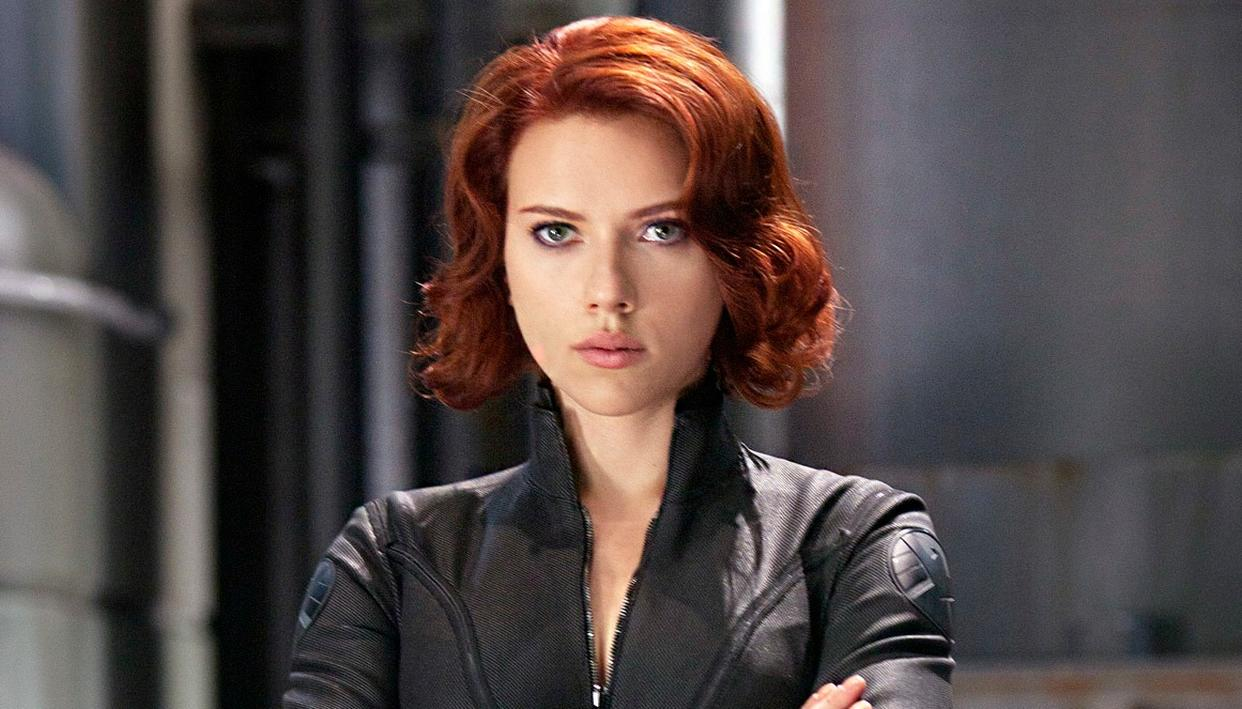

In [8]:
from IPython.display import Image
Image(filename='raw/example.jpg') 

2. 提取人脸

In [9]:
!python align_images.py raw aligned

2021-01-20 15:24:47.142794: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
64045056/64040097 [==============================] - 8s 0us/step


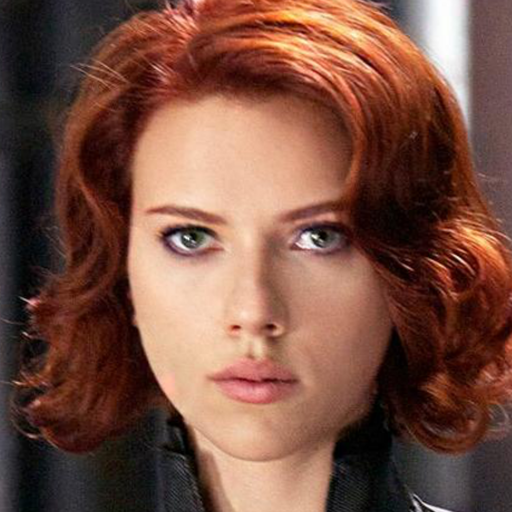

In [10]:
Image(filename='aligned/example_01.png') 

3. 提取特征

In [11]:
!python run_projector.py project_real_images --network=G_pretrain.pth --data_dir=aligned --output=latent/ --num_steps=80 --gpu=0

                                   

Projecting image(s) 1/1
loss: 1.177e+05, lpips_distance: 0.3365, lr: 0.04218
noise_reg: 1.177
                                   

Projecting image(s) 1/1
loss: 1.12e+05, lpips_distance: 0.3342, lr: 0.03455
noise_reg: 1.12
                                   

Projecting image(s) 1/1
loss: 1.065e+05, lpips_distance: 0.3319, lr: 0.0273
noise_reg: 1.065
                                   

Projecting image(s) 1/1
loss: 1.014e+05, lpips_distance: 0.3298, lr: 0.02061
noise_reg: 1.014
                                   

Projecting image(s) 1/1
loss: 9.645e+04, lpips_distance: 0.3277, lr: 0.01464
noise_reg: 0.9645
                                   

Projecting image(s) 1/1
loss: 9.178e+04, lpips_distance: 0.3257, lr: 0.009549
noise_reg: 0.9178
                                   

Projecting image(s) 1/1
loss: 8.734e+04, lpips_distance: 0.3238, lr: 0.00545
noise_reg: 0.8734
                                   

Projecting image(s) 1/1
loss: 8.313e+04, lpip

4. 生成二次元头像

  0%|          | 0/6 [00:00<?, ?it/s]

image0000-step0017.npy


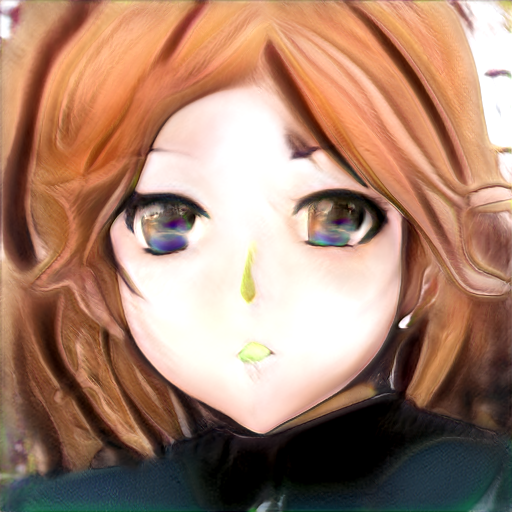

 17%|█▋        | 1/6 [00:03<00:15,  3.14s/it]

image0000-step0033.npy


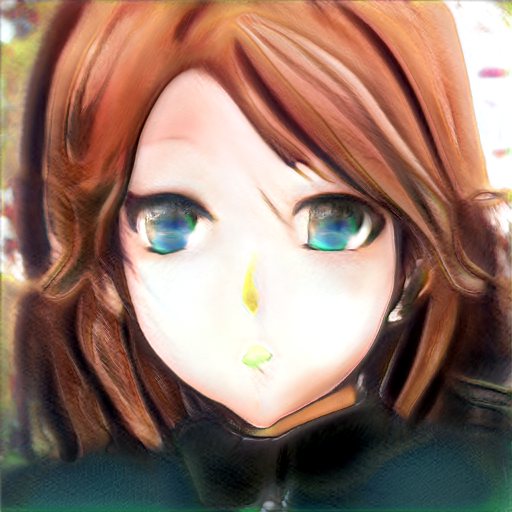

 33%|███▎      | 2/6 [00:04<00:09,  2.46s/it]

image0000-step0049.npy


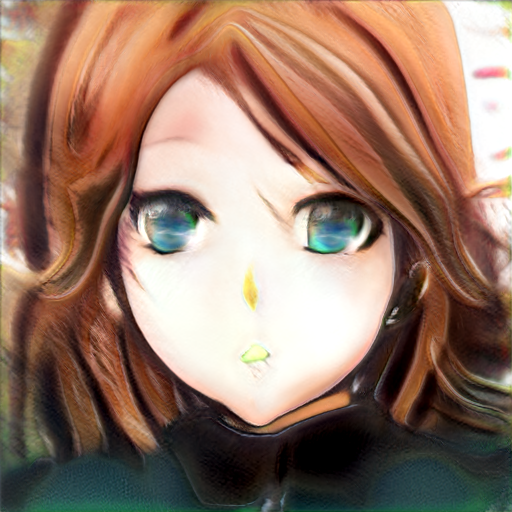

 50%|█████     | 3/6 [00:04<00:05,  1.98s/it]

image0000-step0065.npy


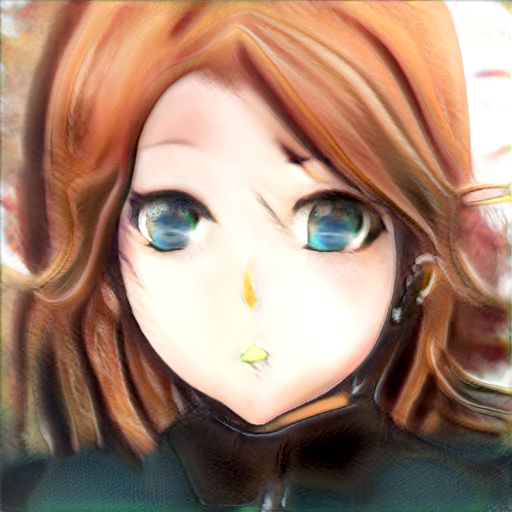

 67%|██████▋   | 4/6 [00:05<00:03,  1.64s/it]

image0000-step0080.npy


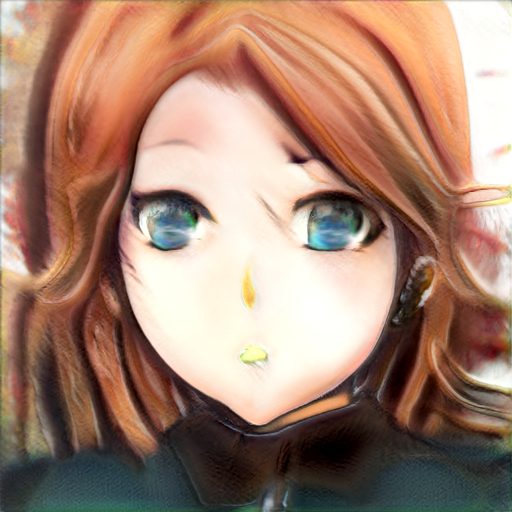

100%|██████████| 6/6 [00:06<00:00,  1.09s/it]


In [12]:
import os
import numpy as np
import torch
import stylegan2
from stylegan2 import utils
import cv2 as cv
from google.colab.patches import cv2_imshow
from tqdm import tqdm
dir = 'latent'

G_blend = 'G_blend.pth'
# G_blend = 'G_out.pth'

def synthesis(G_file, latent_file):
    device = torch.device(0)
    G = stylegan2.models.load(G_file).G_synthesis 
    latent = np.load(latent_file, allow_pickle=True)
    G.to(device)
    latent = torch.tensor(latent[np.newaxis, ...]).to(device)
    out = G(latent)
    out = utils.tensor_to_PIL(out, pixel_min=-1, pixel_max=1)[0]
    return out

for l in tqdm(sorted(os.listdir(dir))):
  if l[-3:] != 'npy':
    continue
  latent = os.path.join(dir, l)
  out = synthesis(G_blend, latent)
  print(l)
  display(out)

out.save('output.png')



